# LetsGrowMore VIP in Data Science
## Batch: November- 2021
## Author: Aarushi Gupta
## Task 4- Advanced Level Task
## Develop a Neural Network that can read Handwriting 

##### The dataset is called MNIST and refers to handwritten digit recognition. You can find more about it on Yann LeCun's website (Director of AI Research, Facebook). He is one of the pioneers of what we've been talking about and of more complex approaches that are widely used today, such as covolutional neural networks (CNNs).

##### The dataset provides 70,000 images (28x28 pixels) of handwritten digits (1 digit per image).

##### The goal is to write an algorithm that detects which digit is written. Since there are only 10 digits (0, 1, 2, 3, 4, 5, 6, 7, 8, 9), this is a classification problem with 10 classes.

##### Begin by neural network machine learning project using the MNIST handwritten digit classification and using Tensorflow and CNN to find the accuracy of the model

### Importing the relevent libraries

In [1]:
import numpy as np
# Importing tensorflow for neural networks and deep learning tasks
import tensorflow as tf
import tensorflow_datasets as tfds

### Loading the dataset

In [2]:
# tfds.load actually loads a dataset (or downloads and then loads if that's the first time you use it) 
#loading the mnist dataset
mnist_dataset, mnist_info=tfds.load(name='mnist',with_info=True,as_supervised=True)
# with_info=True will also provide us with a tuple containing information about the version, features, number of samples
# as_supervised=True will load the dataset in a 2-tuple structure (input, target)

In [3]:
# once we have loaded the dataset, we can easily extract the training and testing dataset with the built references
mnist_train, mnist_test=mnist_dataset['train'],mnist_dataset['test']

In [4]:
#visualizing the dataframe which contains the training dataset
tfds.as_dataframe(mnist_train.take(6),mnist_info)

,image,label
0,,4
1,,1
2,,0
3,,7
4,,8
5,,1


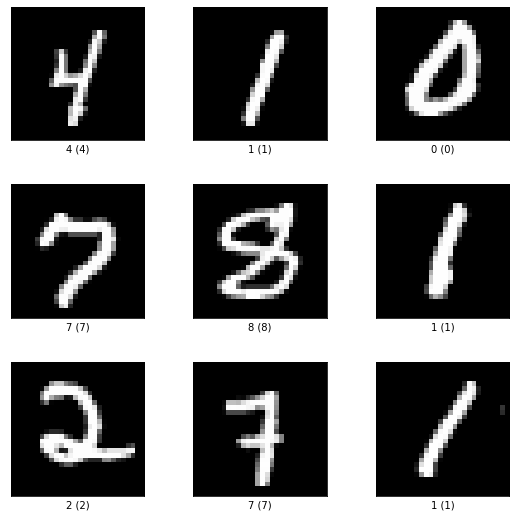

In [5]:
fig = tfds.show_examples(mnist_train, mnist_info)

In [6]:
# by default, TF has training and testing datasets, but no validation sets
# thus we must split it on our own
# we start by defining the number of validation samples as a % of the train samples
# this is also where we make use of mnist_info (we don't have to count the observations)
num_validation_samples=0.1*mnist_info.splits['train'].num_examples
num_validation_samples=tf.cast(num_validation_samples,tf.int64)

In [7]:
# let's also store the number of test samples in a dedicated variable (instead of using the mnist_info one)
num_test_samples=mnist_info.splits['test'].num_examples
# once more, we'd prefer an integer (rather than the default float)
num_test_samples=tf.cast(num_test_samples,tf.int64)

### Scaling the dataset

In [8]:
# normally, we would like to scale our data in some way to make the result more numerically stable
# in this case we will simply prefer to have inputs between 0 and 1
# let's define a function called: scale, that will take an MNIST image and its label
def scale(image,label):
    image=tf.cast(image,tf.float32)
    image/=255
    return image,label

In [9]:
# the method .map() allows us to apply a custom transformation to a given dataset 
scaled_train_validation_data=mnist_train.map(scale)
# for the test data
test_data=mnist_test.map(scale)

### Buffer Size

In [10]:
# this BUFFER_SIZE parameter is here for cases when we're dealing with enormous datasets
BUFFER_SIZE=10000

In [11]:
# shuffling the data
shuffled_train_validation_data=scaled_train_validation_data.shuffle(BUFFER_SIZE)

In [12]:
# our validation data would be equal to 10% of the training set, which we've already calculated
# we use the .take() method to take that many samples
validation_data=shuffled_train_validation_data.take(num_validation_samples)
train_data=shuffled_train_validation_data.skip(num_validation_samples)

In [13]:
# determine the batch size
BATCH_SIZE=100
train_data=train_data.batch(BATCH_SIZE)
validation_data=validation_data.batch(num_validation_samples)
test_data=test_data.batch(num_test_samples)

In [14]:
# takes next batch (it is the only batch)
# because as_supervized=True, we've got a 2-tuple structure
validation_inputs,validation_targets=next(iter(validation_data))
validation_inputs.shape

TensorShape([6000, 28, 28, 1])

### Building the model

In [15]:
# Building the model
input_size=784
output_size=10
hidden_layer_size=50

model=tf.keras.Sequential([
                            # first input layer, it is a tensor of rank 3- convert to vector
                            tf.keras.layers.Flatten(input_shape=(28,28,1)),
                            # 1st hidden layer 
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            # 2nd hidden layer
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            # Final layer
                            tf.keras.layers.Dense(output_size, activation='softmax')
                        ])

In [16]:
# choose the optimizer and the loss function
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Training
NUM_EPOCHS=5
model.fit(train_data,epochs=NUM_EPOCHS,validation_data=(validation_inputs,validation_targets),verbose=2)

Epoch 1/5
540/540 - 7s - loss: 0.4073 - accuracy: 0.8837 - val_loss: 0.2044 - val_accuracy: 0.9408
Epoch 2/5
540/540 - 3s - loss: 0.1778 - accuracy: 0.9481 - val_loss: 0.1458 - val_accuracy: 0.9573
Epoch 3/5
540/540 - 3s - loss: 0.1332 - accuracy: 0.9612 - val_loss: 0.1191 - val_accuracy: 0.9645
Epoch 4/5
540/540 - 3s - loss: 0.1087 - accuracy: 0.9679 - val_loss: 0.1016 - val_accuracy: 0.9697
Epoch 5/5
540/540 - 3s - loss: 0.0909 - accuracy: 0.9728 - val_loss: 0.0913 - val_accuracy: 0.9725


### Testing the model

after training on the training data and validating on the validation data, we test the final prediction power of our model by running it on the test dataset that the algorithm has NEVER seen before.

It is very important to realize that fiddling with the hyperparameters overfits the validation dataset.

In [18]:
test_loss,test_accuracy=model.evaluate(test_data)

1/1 [==============================] - 1s 1s/step - loss: 0.1025 - accuracy: 0.9690


In [19]:
# We can apply some nice formatting if we want to
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

Test loss: 0.10. Test accuracy: 96.90%


## Result

#### Using the initial model and hyperparameters given in this notebook, the final test accuracy should be roughly around 96.9%.

#### Each time the code is rerun, we get a different accuracy as the batches are shuffled, the weights are initialized in a different way, etc.